<a href="https://colab.research.google.com/github/ssook1222/codeResearch/blob/main/%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import files
file_uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [6]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [10]:
from sklearn.svm import SVC
cf=SVC(kernel='linear', random_state=0)
cf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
y_pred=cf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


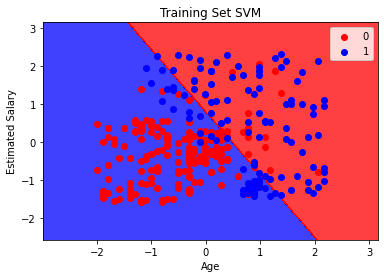

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
plt.contourf(X1,X2,cf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('blue','red')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('Training Set SVM')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()